In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import win32com.client as win32
#import xlwings as xw
#from os import path
import os, sys, re, string
from io import StringIO

from pprint import pprint
import operator
import functools
import matplotlib
from matplotlib import rcParams


import matplotlib.pyplot as plt
import seaborn as sb 
import copy


In [2]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

#stl = STL(df_counts, seasonal=13)
#res = stl.fit()
#fig = res.plot()


In [3]:
#Creat the following lists
food_list = #
fuel_list = #

construction_list = #

furniture_list = #

water_list = #

general_list = #

transportation_list = #

mail_list = #


lst = {"Food": food_list, "Fuel": fuel_list, "Transportation": transportation_list,"General": general_list, "Furniture": furniture_list, 
       "Water": water_list, "Construction": construction_list, "Mail": mail_list}
def func_cat(a):
    for i in lst.keys():
        list_i = lst[i]
        if a in list_i:
            return i
    return "Other"






In [4]:
# load the dataset into org_df
org_df = #pd.read_csv()

C:\Users\arnoo\ns_env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [686]:
df = org_df.copy()

In [687]:
df["goods_category"] = df.goods_type.apply(lambda x: func_cat(x))


In [688]:
def get_data_cat(df, cat):

    new_data = df[df['goods_category'] == cat]
    df_wt_cat = new_data[['wt_shipped']].groupby([new_data['date_m']]).sum()

    return new_data, df_wt_cat

In [689]:
df['date_s'] = pd.to_datetime(df['date_s'])


In [690]:
df['date_s']= df['date'].apply(lambda x: '-'.join(str(x).split(' ')[0].split('-')[0:3])) #considers days as well
df['date_m']= df['date'].apply(lambda x: '-'.join(str(x).split(' ')[0].split('-')[0:2])) #does not considers days 


In [691]:
df['date_w']= df['date'].apply(lambda x: '-'.join(str(x).split(' ')[0].split('-')[0:1])) #does not considers days 
df['date_w'] = pd.to_datetime(df['date_w'])


In [388]:
df_s = df[['wt_shipped','date_s']]

In [389]:
df_s = df_s[['wt_shipped']].groupby(df_s['date_s']).sum()

In [393]:
df_s = df_s.resample('W').mean()

In [377]:
df_s.set_index('date_s')

,wt_shipped
date_s,
2016-03-18,103
2016-03-18,105
2016-03-30,13
2016-04-22,5
2016-07-20,4
...,...
2020-05-30,47
2020-05-30,38
2020-03-17,27


In [692]:
df['date_s'] = pd.to_datetime(df['date_s'])
df['date_m'] = pd.to_datetime(df['date_m'])


In [693]:
dict_df_cats = {}
dict_df_wt_cats = {}
for cat in lst.keys():
    dict_df_cats[cat] = pd.DataFrame()
    dict_df_wt_cats[cat] = pd.DataFrame()


    dict_df_cats[cat], dict_df_wt_cats[cat] = get_data_cat(df, cat)

In [694]:
df_counts = df['date_m'].value_counts().rename_axis('Date').reset_index(name='Number of Records')

In [695]:
df_wt = df[['wt_shipped']].groupby([df['date_m']]).sum()
df_wt

,wt_shipped
date_m,
2014-09-01,272
2014-10-01,25888
2014-11-01,108182
2014-12-01,221832
2015-01-01,380651
...,...
2020-01-01,1765235
2020-02-01,1584520
2020-03-01,1830269


In [256]:
detinations_list = df.ship_destination.unique()

In [257]:
airports = {'YWP':'Webequie', 'ZPB':'Sachigo Lake', 'KB6':'Angling Lake', 'YLH':'Lansdowne House', 'YFA':'Fort Albany', 'YRL':'Red Lake', 'YYU':'Kapuskasing', 'YAC':'Cat Lake', 'YRS':'Red Sucker Lake', 'YIV':'Island Lake'
 ,'ZTM':'Shamattawa', 'YTL':'Big Trout Lake', 'NE3':'Bearskin Lake', 'JV7':'Summer Beaver', 'ZMD':'Muskrat Dam' , 'KL3': 'Wunnumin Lake', 'NM5':'Kingfisher Lake', 'PV7': 'Poplar Hill' , 'YGO':'Gods Lake Narrows', 'YFH':'Fort Hope'
 ,'YPL':'Pickle Lake', 'ZSJ':'Sandy Lake', 'YAQ':'Kasabonika', 'YXL': 'Sioux Lookout' , 'YER': 'Fort Severn' , 'ZKE': 'Kashechewan' , 'PV8': 'Keewaywin' , 'YVZ': 'Deer Lake' , 'ZRJ': 'Round Lake', 'YQT': 'Thunder Bay'
 ,'YPM':'Pikangikum', 'KQ3':'North Spirit Lake', 'YPO':'Peawanuck', 'YKP':'Ogoki Post' , 'YOH': 'Oxford House' , 'ZGI': 'Gods River' , 'ZAC': 'York Landing' , 'ZGR': 'Little Grand Rapids' , 'YYQ':'Churchill', 'ZWH': 'Lac Brochet'
 ,'YBT':'Brochet', 'YMO':'Moosonee', 'YAT':'Attawapiskat', 'YTH':'Thompson', 'YST': 'St. Theresa Point' , 'YBQ': 'Tadoule Lake' , 'YNN': 'Lynn Lake' , 'YWJ': 'Déline', 'ZFN':'Tulita'
 ,'YBK':'Baker Lake', 'YRT':'Rankin Inlet', 'YVQ':'Norman Wells', 'YGH':'Fort Good Hope', 'YEK': 'Arviat' , 'YAB': 'Arctic Bay' , 'YUX': 'Hall Beach' , 'YYH': 'Taloyoak', 'YIO':'Pond Inlet'
 ,'YHK':'Gjoa Haven', 'YCS':'Chesterfield Inlet', 'YGT':'Igloolik', 'YZF':'Yellowknife' , 'YZS': 'Coral Harbour' , 'YCB': 'Cambridge Bay' , 'YUT': 'Repulse Bay' , 'ZSN': 'South Indian Lake'
 , 'KD9' : 'Slate Falls', 'YNN': 'Nejanilini Lake, MB', 'YQN':'Nakina', 'YFB': 'Iqaluit', 'YWG': 'Winnipeg'}

In [171]:
df_counts = df_counts.set_index('Date')


In [172]:
df_wt

,wt_shipped
date_m,
2014-09-01,272
2014-10-01,25888
2014-11-01,108182
2014-12-01,221832
2015-01-01,380651
...,...
2020-01-01,1765235
2020-02-01,1584520
2020-03-01,1830269


In [173]:
df_counts = df_counts.sort_index()
df_counts

,Number of Records
Date,
2014-09-01,8
2014-10-01,91
2014-11-01,353
2014-12-01,488
2015-01-01,482
...,...
2020-01-01,6348
2020-02-01,6040
2020-03-01,7082


Using built in seasonal_decompose function from statsmodels package

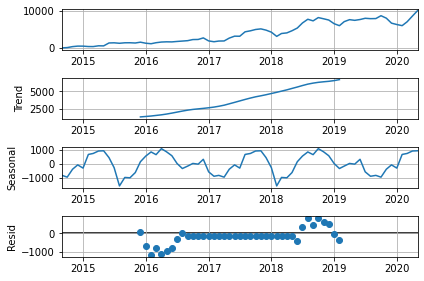

In [174]:
decomposition = sm.tsa.seasonal_decompose(df_counts,  model = 'additive',period = 30)
fig = decomposition.plot()
plt.show()

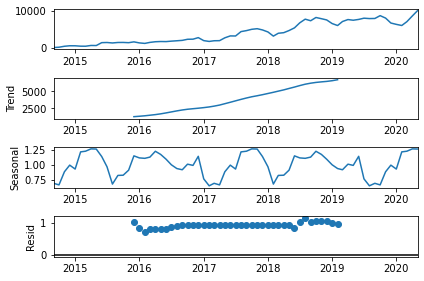

In [22]:
decomposition = sm.tsa.seasonal_decompose(df_counts,  model = 'multiplicative',period = 30)
fig = decomposition.plot()
plt.show()

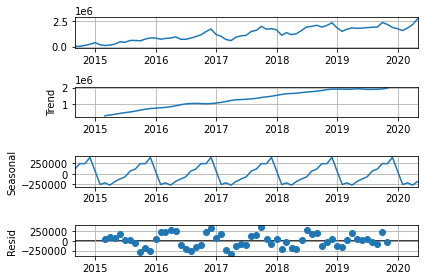

In [536]:
decomposition = sm.tsa.seasonal_decompose(df_wt,  model = 'additive',period = 12) #for monthly data, period must be 12
fig = decomposition.plot()
plt.show()

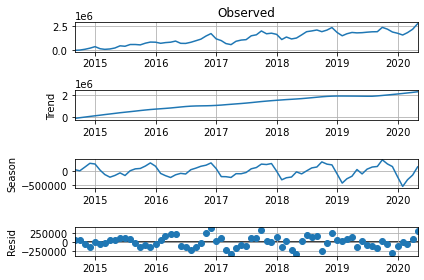

In [550]:
from statsmodels.tsa.seasonal import STL
stl = STL(df_wt, seasonal=13)
res = stl.fit()
fig = res.plot()

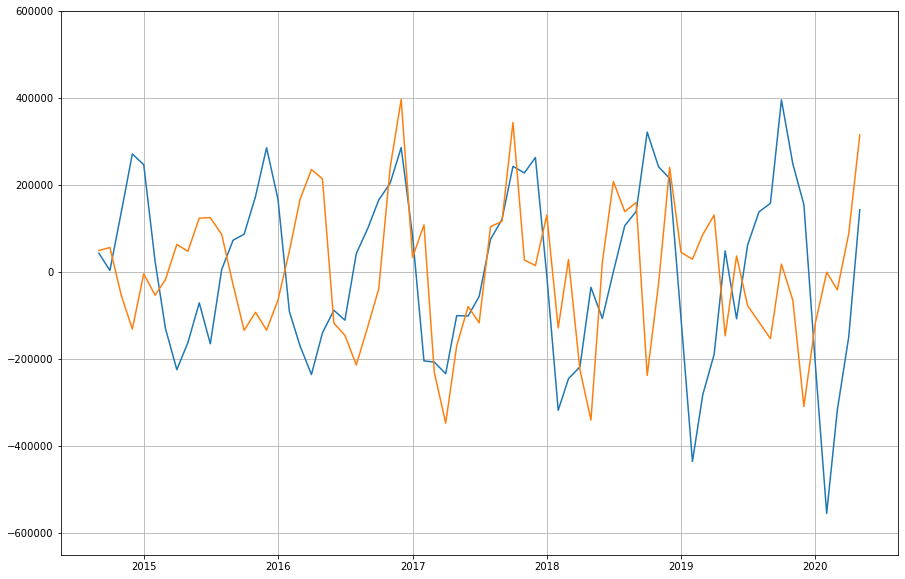

In [567]:
#result_stl = STL(df_wt, seasonal=13)

figsize=(15, 10)
plt.figure(figsize=figsize)
plt.plot(res.seasonal)
plt.plot(res.resid)

plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 600000)
plt.show()


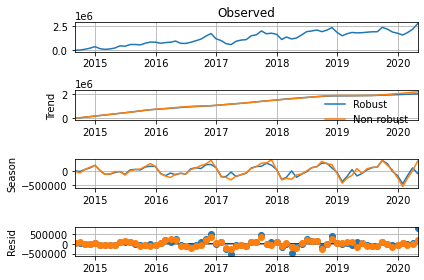

In [569]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none')
        else:
            ax.plot(series)
            if comp == 'trend':
                ax.legend(legend, frameon=False)


stl = STL(df_wt, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(df_wt, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ['Robust','Non-robust'])


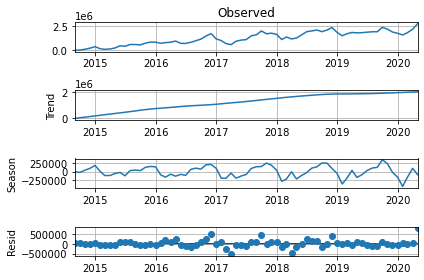

In [570]:
stl = STL(df_wt, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()

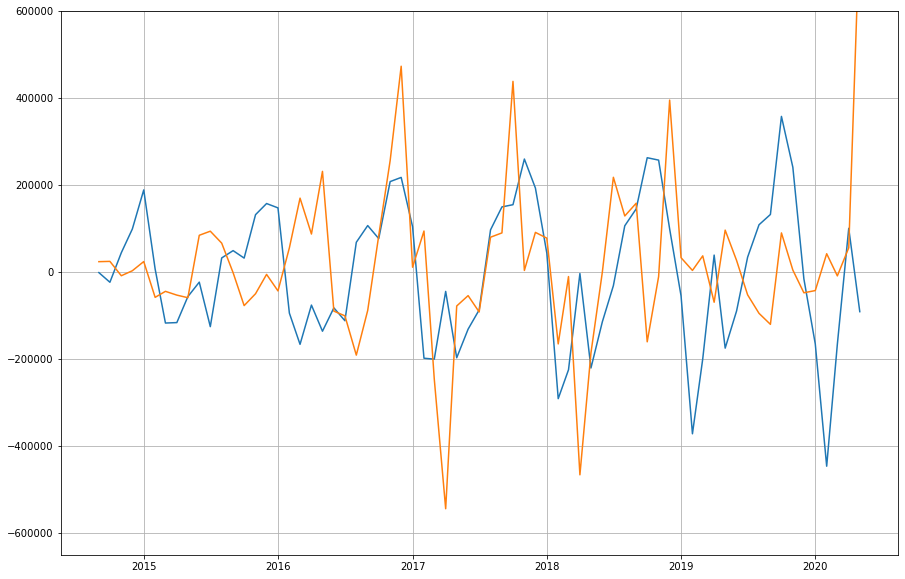

In [571]:

figsize=(15, 10)
plt.figure(figsize=figsize)
plt.plot(res_robust.seasonal)
plt.plot(res_robust.resid)

plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 600000)
plt.show()

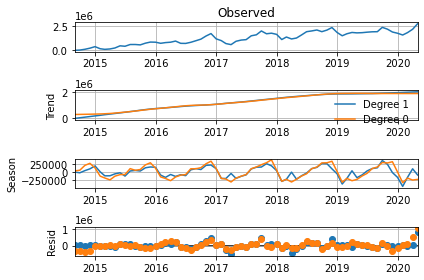

In [573]:
stl = STL(df_wt, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True)
res_deg_0 = stl.fit()
fig = res_robust.plot()
add_stl_plot(fig, res_deg_0, ['Degree 1','Degree 0'])

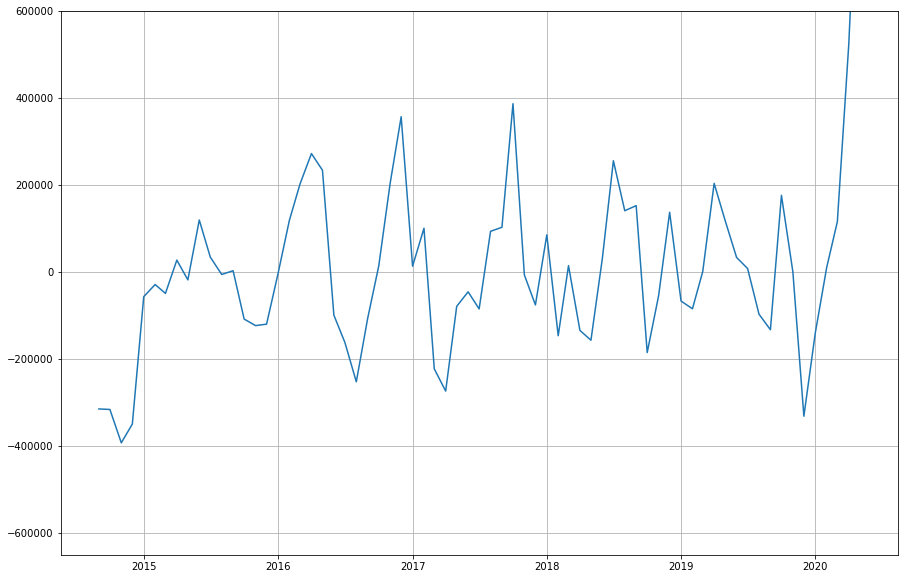

In [603]:
stl = STL(df_wt, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True)
res_deg_0 = stl.fit()


figsize=(15, 10)
plt.figure(figsize=figsize)
#plt.plot(res_deg_0.seasonal)
plt.plot(res_deg_0.resid)

plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 600000)
plt.show()

In [ ]:
figsize=(15, 10)
plt.figure(figsize=figsize)
plt.plot(result.seasonal)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
#plt.ylim(-650000, 2500000)
plt.show()


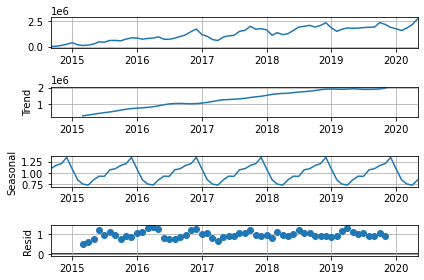

In [537]:
decomposition = sm.tsa.seasonal_decompose(df_wt,  model = 'multiplicative',period = 12)
fig = decomposition.plot()
plt.show()

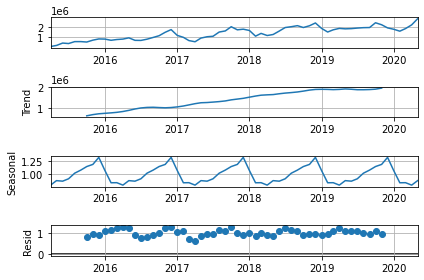

<Figure size 1080x720 with 0 Axes>

In [488]:
decomposition_s = sm.tsa.seasonal_decompose(df_s,  model = 'additive',period = 12)
fig = decomposition.plot()
plt.figure(figsize=figsize)

plt.show()

With the use of package, seasonality can be observed. It just throws away not complete years. 

In [545]:
result = seasonal_decompose(df_wt, model='additive', freq=12)

C:\Users\arnoo\ns_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


Now we will get the seasonality without using the built-in function

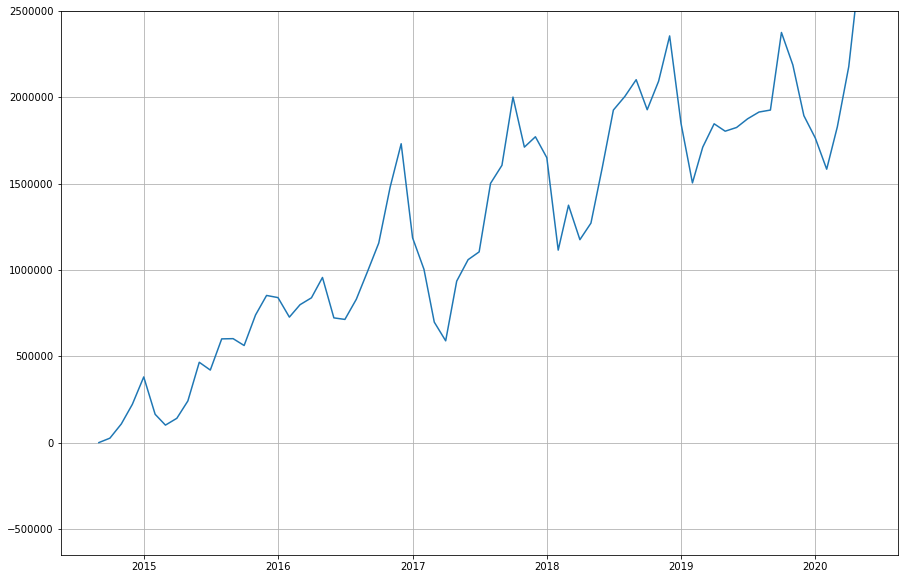

In [654]:
figsize=(15, 10)
plt.figure(figsize=figsize)
plt.plot(df_wt)
plt.ylim(-650000, 2500000)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.show()


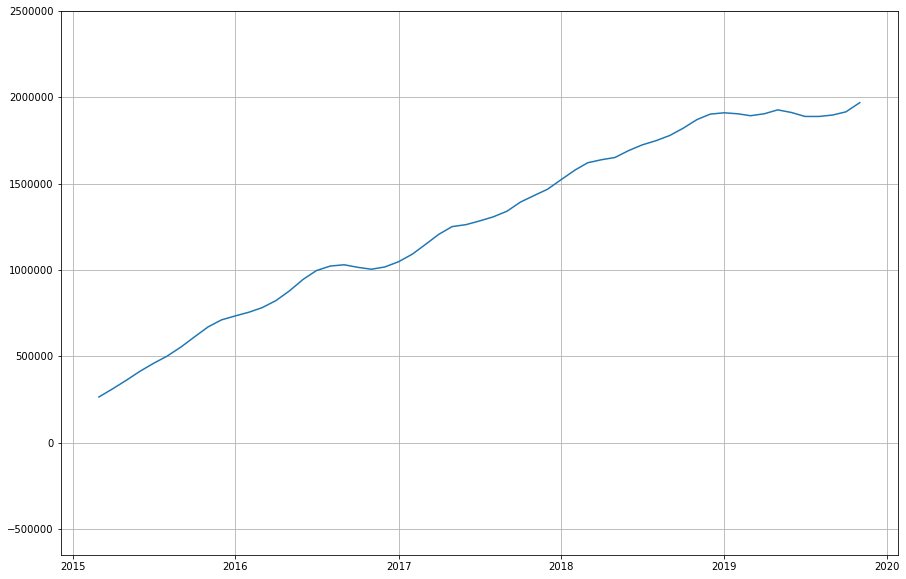

In [547]:
figsize=(15, 10)
plt.figure(figsize=figsize)
plt.plot(result.trend)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 2500000)
plt.show()


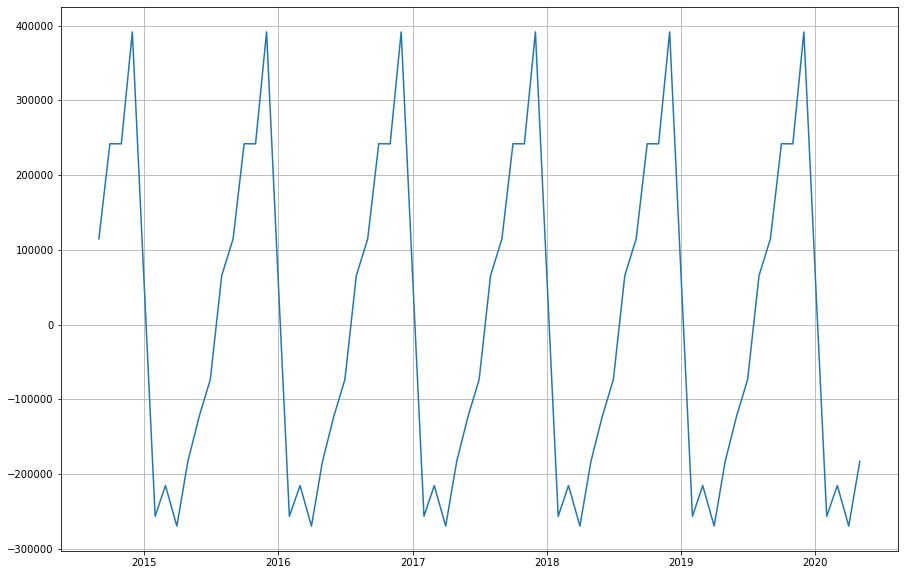

In [548]:
figsize=(15, 10)
plt.figure(figsize=figsize)
plt.plot(result.seasonal)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
#plt.ylim(-650000, 2500000)
plt.show()



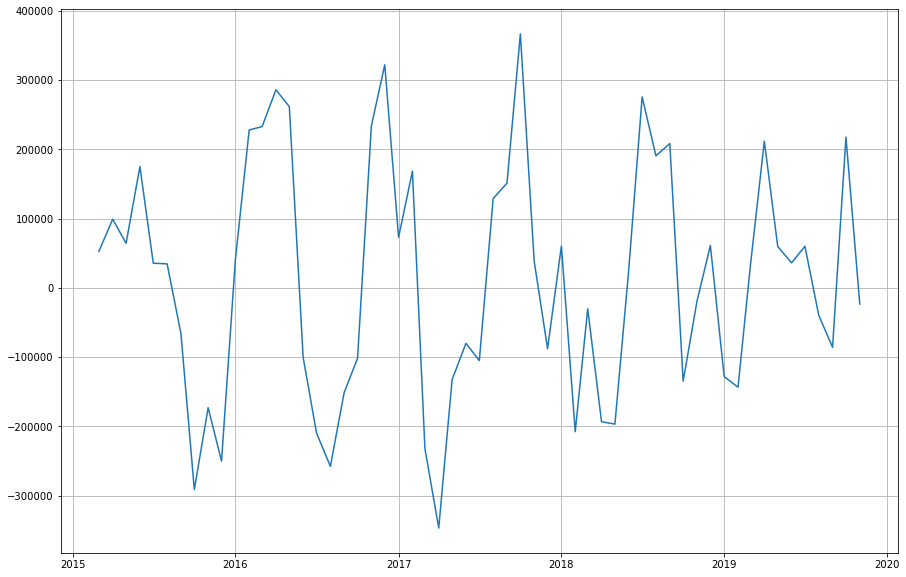

In [549]:
figsize=(15, 10)
plt.figure(figsize=figsize)
plt.plot(result.resid)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
#plt.ylim(-650000, 2500000)
plt.show()


Now I will try to capture it manually


<AxesSubplot:xlabel='date_m'>

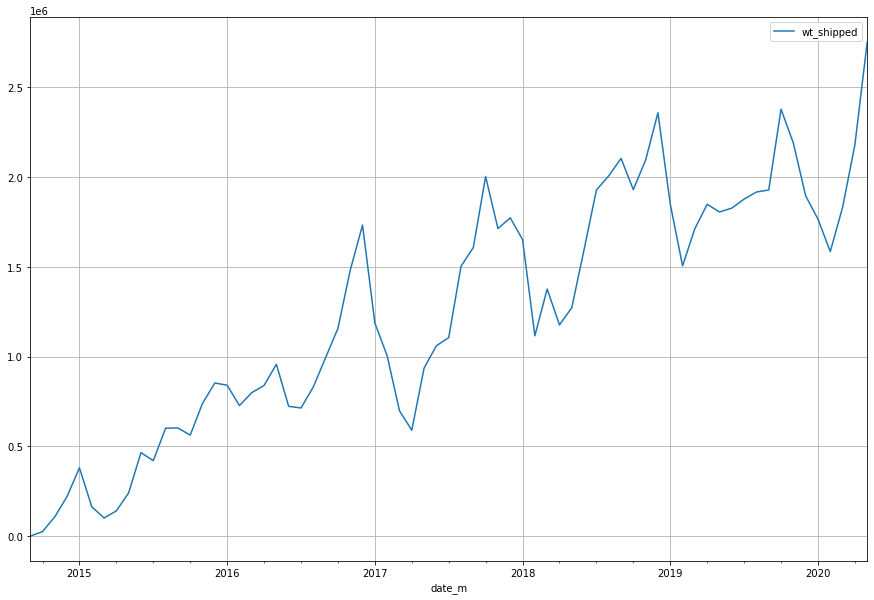

In [698]:
df_wt.plot(figsize=figsize)

In [721]:
order = 2 #second degree polynomial
coef = np.polyfit(np.arange(len(df_wt['wt_shipped'])),
                  df_wt['wt_shipped'].values.ravel(),
                  order)
poly_mdl = np.poly1d(coef)  # for coef is for constant term, second coef for x abd thisr coef for x^2
poly_mdl


poly1d([ -238.04402769, 47389.36395956,  5277.30454029])

In [722]:
trend = pd.Series(data = poly_mdl(np.arange(len(df_wt['wt_shipped']))),
                  index = df_wt.index)

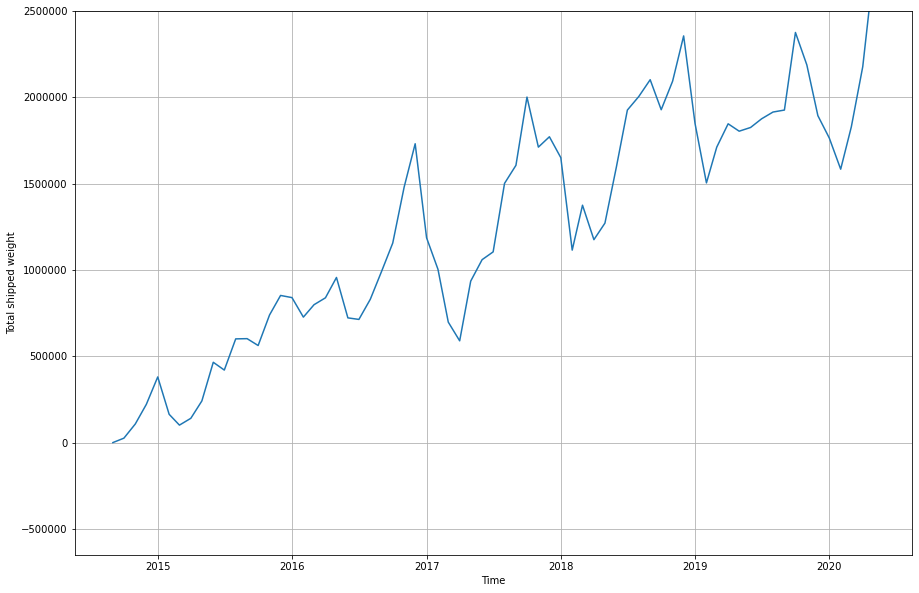

In [723]:
figsize=(15, 10)
plt.figure(figsize=figsize)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 2500000)

plt.plot(df_wt)
#plt.plot(trend)
#plt.title("trend of the total shipped weight")
plt.ylabel("Total shipped weight")
plt.xlabel("Time")
plt.show()

In [724]:
detrended = df_wt['wt_shipped']- trend

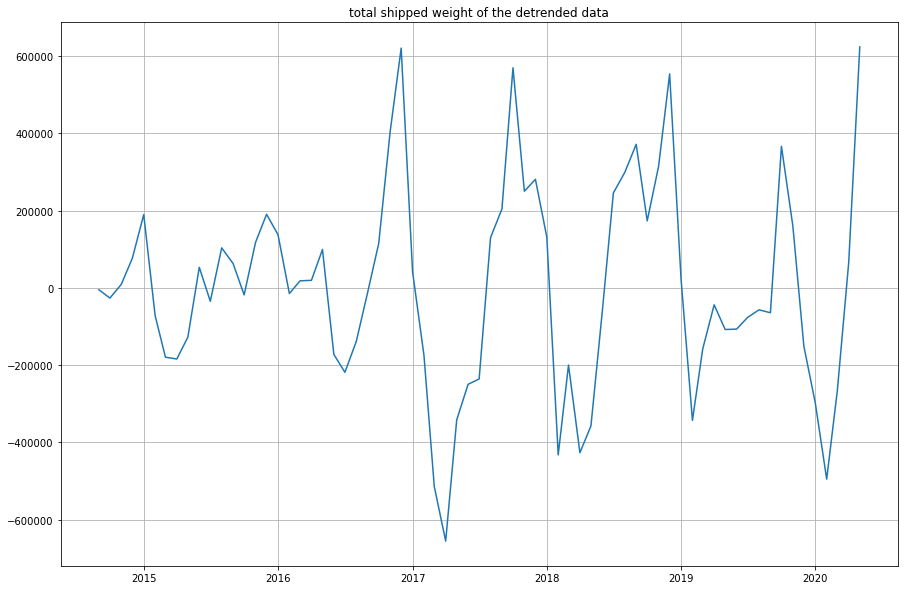

In [725]:
plt.figure(figsize=figsize)
plt.plot(detrended)
plt.title("total shipped weight of the detrended data")
plt.show()

In [726]:
seasonal = detrended.groupby(by = detrended.index.month).mean()

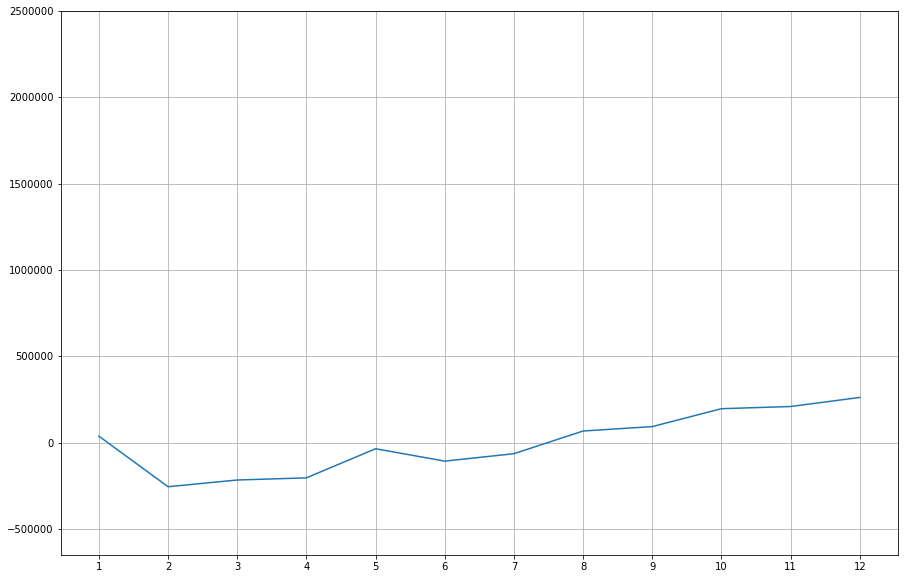

In [727]:
plt.figure(figsize=figsize)
plt.plot(seasonal)
plt.locator_params(axis='x', nbins=24)
plt.ylim(-650000, 2500000)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')



In [728]:
list_date = df['date_str'].unique().tolist()
list_date.sort()

In [707]:
min(seasonal_component.wt_shipped)

-259145.89793304657

C:\Users\arnoo\ns_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  # Remove the CWD from sys.path while we load stuff.


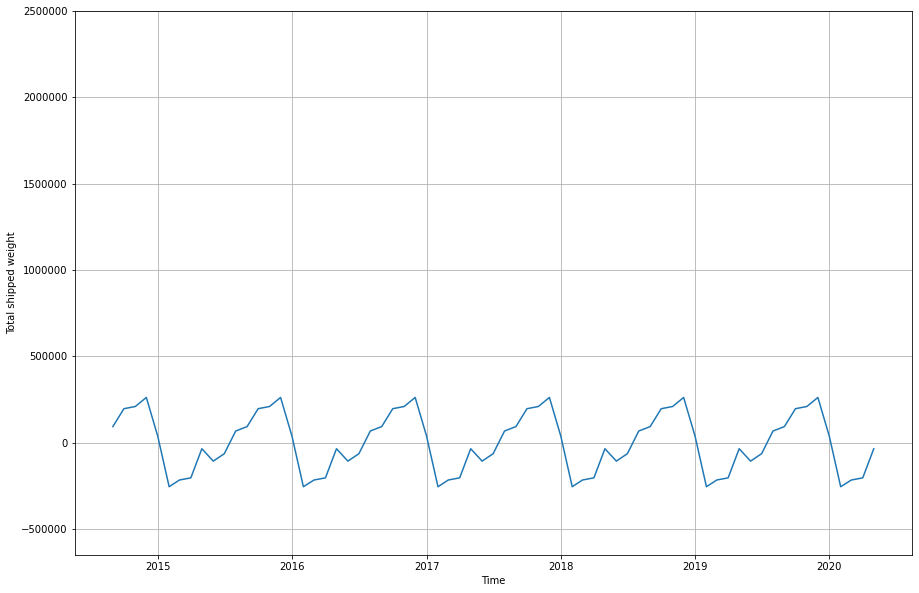

In [729]:
#here we repeat the seasonality in order to remove it 
#col = 'Total arrivals'
#import copy
plt.figure(figsize=figsize)

seasonal_component = copy.deepcopy(df_wt)
for i in seasonal.index:
    seasonal_component.loc[seasonal_component.index.month == i, 'wt_shipped'] = seasonal.loc[i]
plt.plot(seasonal_component)
plt.locator_params(axis='x', nbins=120)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 2500000)
#plt.title("seasonality of the total shipped weight")
plt.ylabel("Total shipped weight")
plt.xlabel("Time")
plt.show()

For better visualization of the seasonality we use the following plot

C:\Users\arnoo\ns_env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


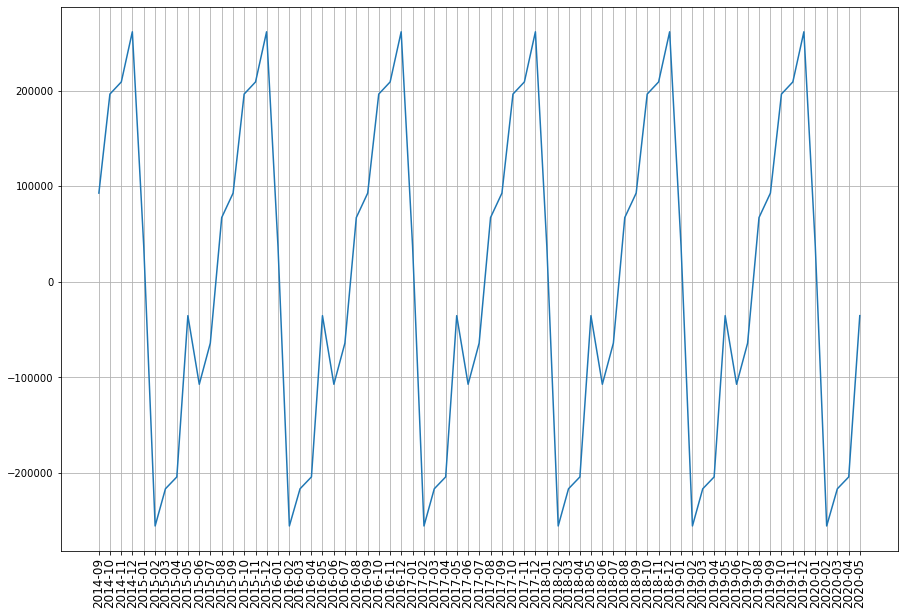

In [730]:
import matplotlib.patches as patches

#plt.figure(figsize=figsize)

#ax = df_tot.plot.bar(stacked=True, colormap='Set1', figsize = (20,10))

fig, ax = plt.subplots(figsize=figsize)

ax.plot(seasonal_component)
#ax.set_ticks(list_date, rotation=90)
#ax.locator_params(numticks=12)
#ax.xticks(list_date, rotation=90)
ax.set_xticks(list_date) 
ax.set_xticklabels(list_date, fontsize=12, rotation=90)
#ax.xticks(rotation=90)
#ax.tick_params(labelrotation=90)



fig.show()

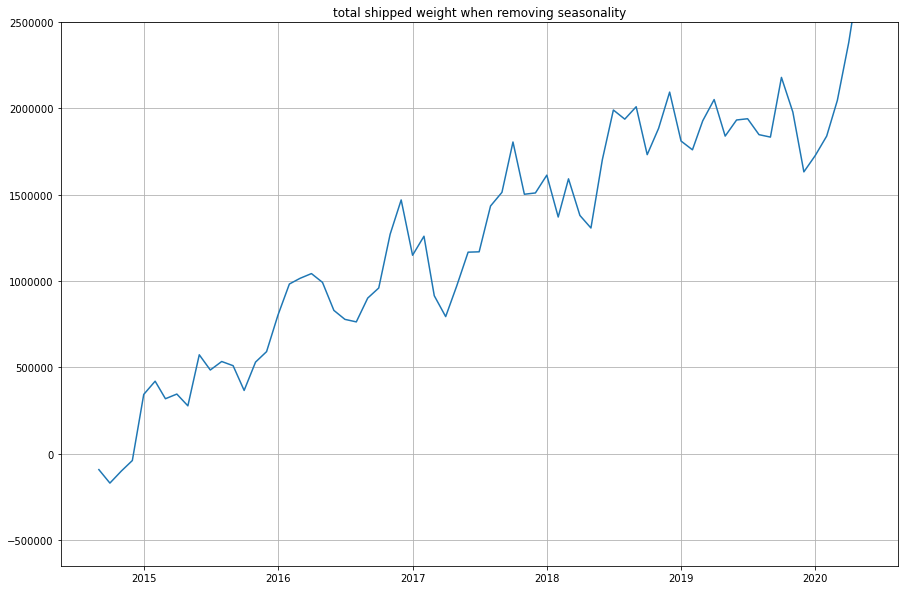

In [731]:
deseasonal = df_wt - seasonal_component
plt.figure(figsize=figsize)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 2500000)
plt.plot(deseasonal)
plt.title("total shipped weight when removing seasonality")
plt.show()

In [732]:
#use the previusly captured trend
trend_comp = pd.DataFrame(data = trend,
                          index = df_wt.index,
                          columns=['wt_shipped'])


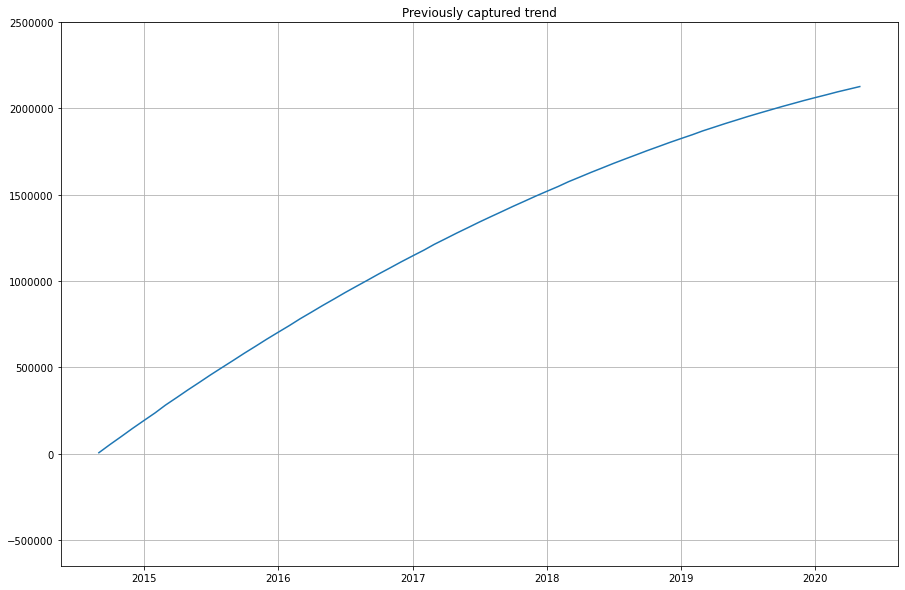

In [733]:
plt.figure(figsize=figsize)
plt.plot(trend_comp)
plt.title("Previously captured trend")
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 2500000)
plt.show()

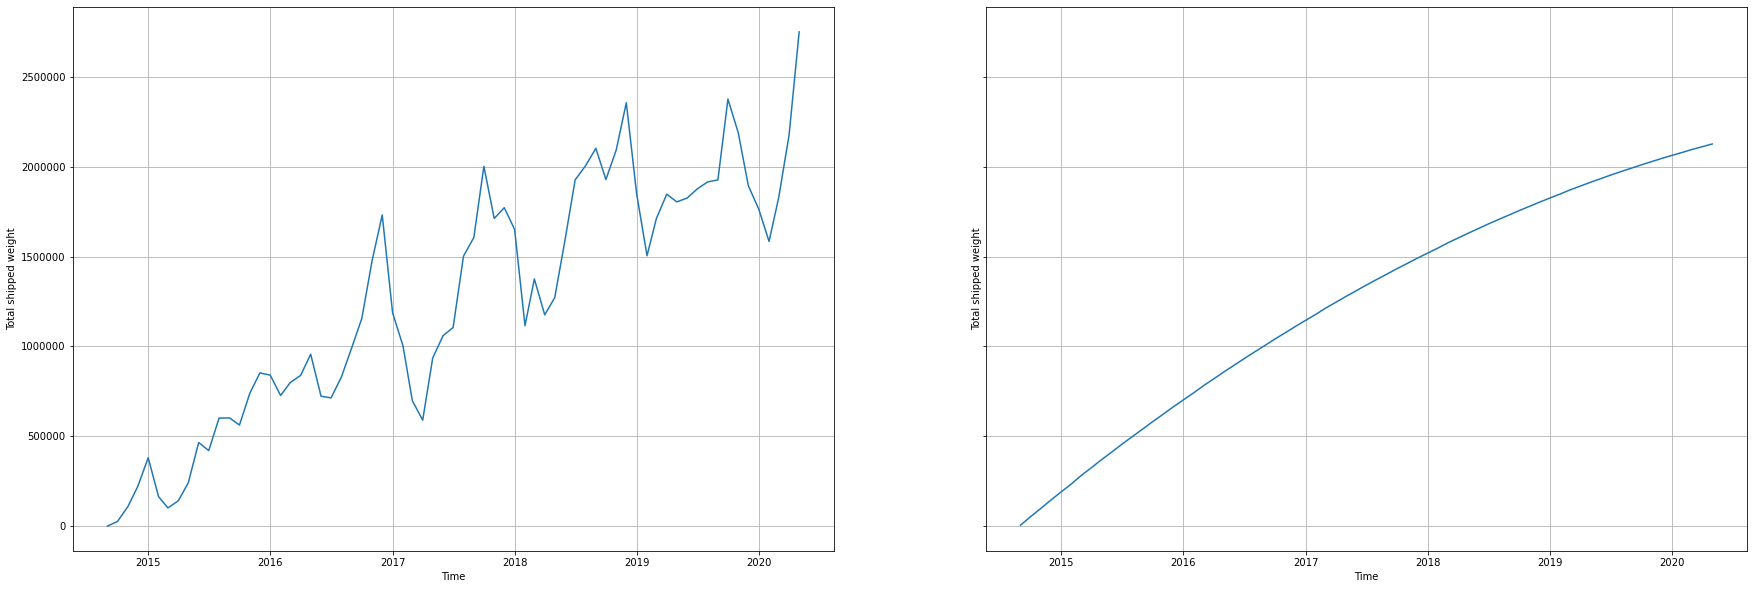

In [734]:
f, (bx, ax) = plt.subplots(1,2,sharey=True,sharex=True, figsize=(30,10)) 


ax.plot(trend_comp)
ax.set_ylabel("Total shipped weight")
ax.set_xlabel("Time")
#ax.ticklabel_format(style='plain')
#plt.ticker.Formatter(useOffset=None, useMathText=None, useLocale=None)
ax.ticklabel_format(style = 'plain', useOffset=None, axis='y')
bx.plot(df_wt)
bx.set_ylabel("Total shipped weight")
bx.set_xlabel("Time")
#bx.ticklabel_format(useOffset=False)
bx.ticklabel_format(style = 'plain', useOffset=None, axis='y')

plt.show()

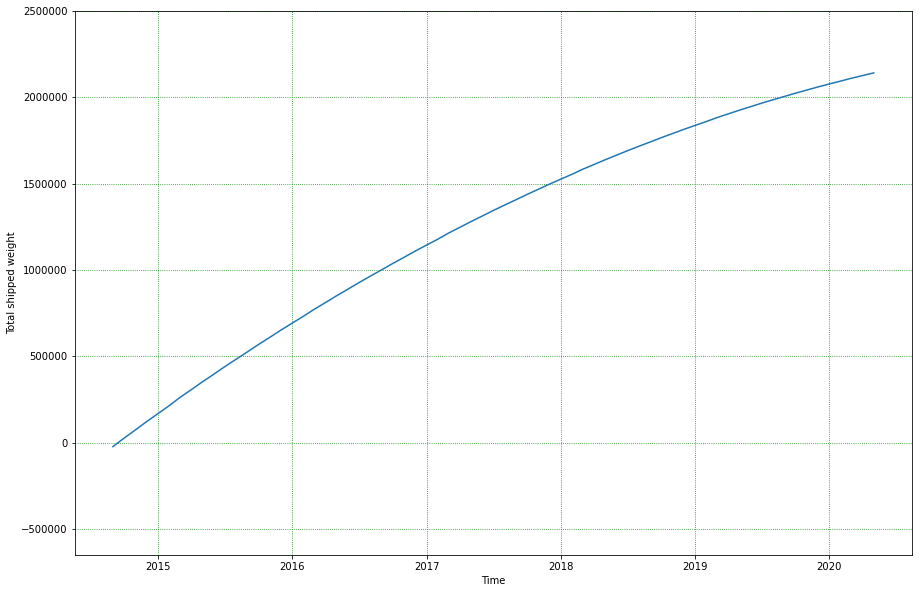

In [735]:
#get the approximated trend
order =2
coef = np.polyfit(np.arange(len(deseasonal)), deseasonal['wt_shipped'], order)
coef

poly_mdl = np.poly1d(coef)
trend_comp1 = pd.DataFrame(data = poly_mdl(np.arange(len(df_wt['wt_shipped']))),
                          index = df_wt.index,
                          columns=['wt_shipped'])


plt.figure(figsize=figsize)
#plt.axes([0.1,0.06,0.5,0.8])
plt.plot(trend_comp1)

plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 2500000)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')

plt.ylabel("Total shipped weight")
plt.xlabel("Time")
plt.grid(linestyle = ':', color = 'green')

#plt.title("Recalculating the trend")
plt.show()

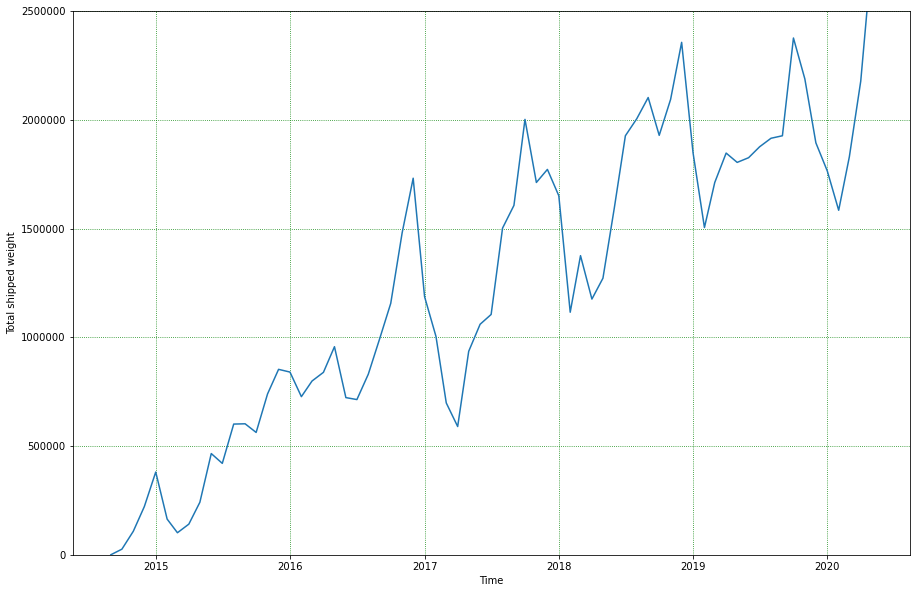

In [715]:
figsize=(15, 10)
plt.figure(figsize=figsize)
plt.plot(df_wt)
plt.ylim(0, 2500000)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
#plt.plot(trend)
#plt.title("trend of the total shipped weight")
plt.ylabel("Total shipped weight")
plt.xlabel("Time")
plt.grid(linestyle = ':', color = 'green')

plt.show()

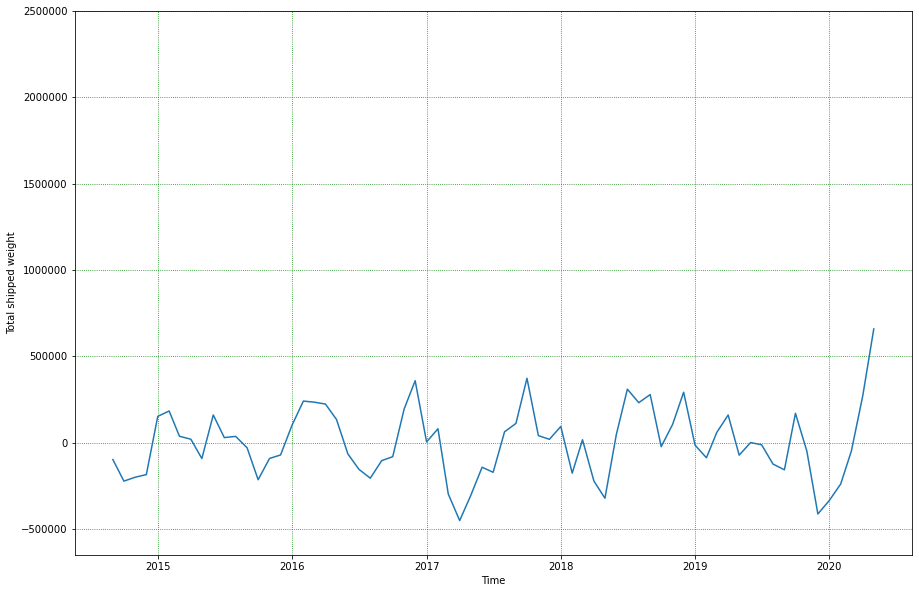

In [736]:
residual = df_wt - seasonal_component - trend_comp

plt.figure(figsize=figsize)
plt.plot(residual)
#plt.title("redidual of the total shipped weight")

plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')
plt.ylim(-650000, 2500000)
#plt.axes().spines['left'].set_position(('data', 10))

plt.ylabel("Total shipped weight")
plt.xlabel("Time")
plt.grid(linestyle = ':', color = 'green')


plt.show()

#make it work

In [54]:
#to hide some of the unnecesary ticks
list_date_labels = []
for i in range(69):
    if (i-4)%12==0:
        list_date_labels.append(list_date[i])
    else:
        list_date_labels.append('')
        
      

C:\Users\arnoo\ns_env\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


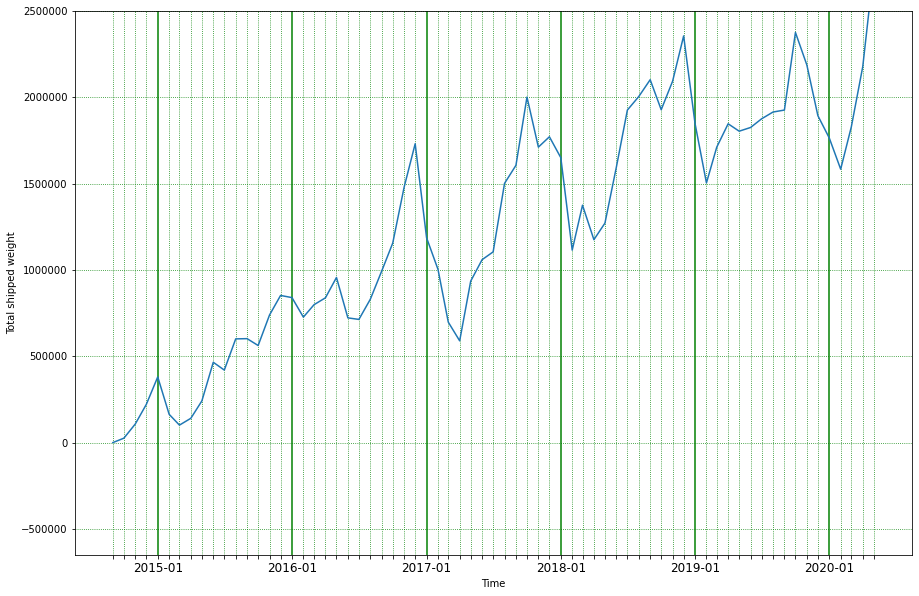

In [753]:
fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(df_wt)
#ax.set_ticks(list_date, rotation=90)
#ax.locator_params(numticks=12)
#ax.xticks(list_date, rotation=90)
ax1.set_xticks(list_date) 
ax1.set_xticklabels(list_date_labels, fontsize=12)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')

plt.ylim(-650000, 2500000)
plt.ylabel("Total shipped weight")
plt.xlabel("Time")

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
#plt.rcParams['grid.color'] = "#cccccc"
#ax.xticks(rotation=90)
#ax.tick_params(labelrotation=90)
ax1.grid(linestyle = ':', color = 'green')

a = ax1.get_xgridlines()
darker_grids = []

for i in range(0,len(a)):
    if (i-4)%12 == 0:
        darker_grids.append(a[i])
        
for b in darker_grids:   
    b.set_color('green')
    b.set_linewidth(1.5)
    b.set_linestyle('-')


fig.show()

In [755]:
df_wt[:10]

,wt_shipped
date_m,
2014-09-01,272
2014-10-01,25888
2014-11-01,108182
2014-12-01,221832
2015-01-01,380651
2015-02-01,164225
2015-03-01,101457
2015-04-01,141008
2015-05-01,241600


C:\Users\arnoo\ns_env\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


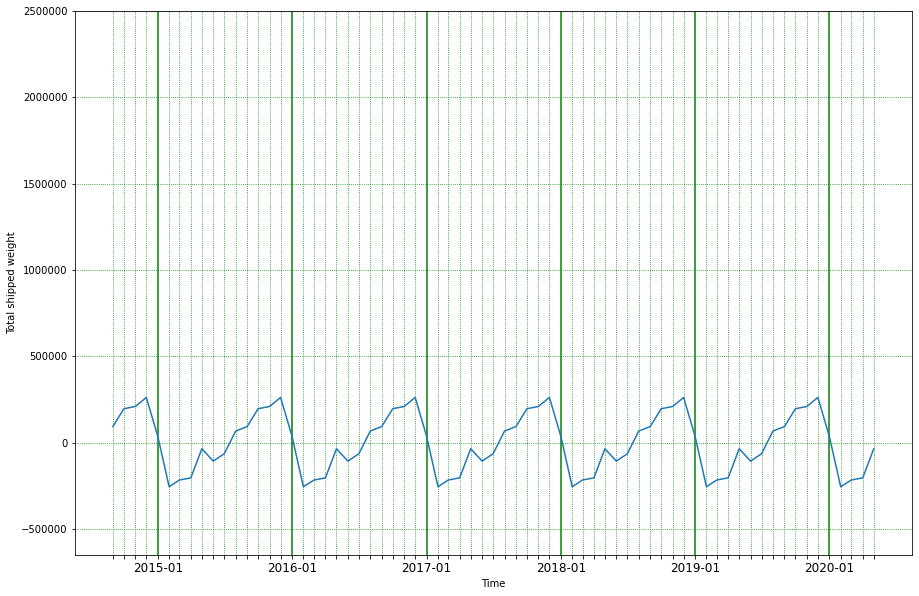

In [737]:
fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(seasonal_component)
#ax.set_ticks(list_date, rotation=90)
#ax.locator_params(numticks=12)
#ax.xticks(list_date, rotation=90)
ax1.set_xticks(list_date) 
ax1.set_xticklabels(list_date_labels, fontsize=12)
plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')

plt.ylim(-650000, 2500000)
plt.ylabel("Total shipped weight")
plt.xlabel("Time")

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
#plt.rcParams['grid.color'] = "#cccccc"
#ax.xticks(rotation=90)
#ax.tick_params(labelrotation=90)
ax1.grid(linestyle = ':', color = 'green')

a = ax1.get_xgridlines()
darker_grids = []

for i in range(0,len(a)):
    if (i-4)%12 == 0:
        darker_grids.append(a[i])
        
for b in darker_grids:   
    b.set_color('green')
    b.set_linewidth(1.5)
    b.set_linestyle('-')


fig.show()

In [696]:
list_date = df['date_str'].unique().tolist()
list_date.sort()

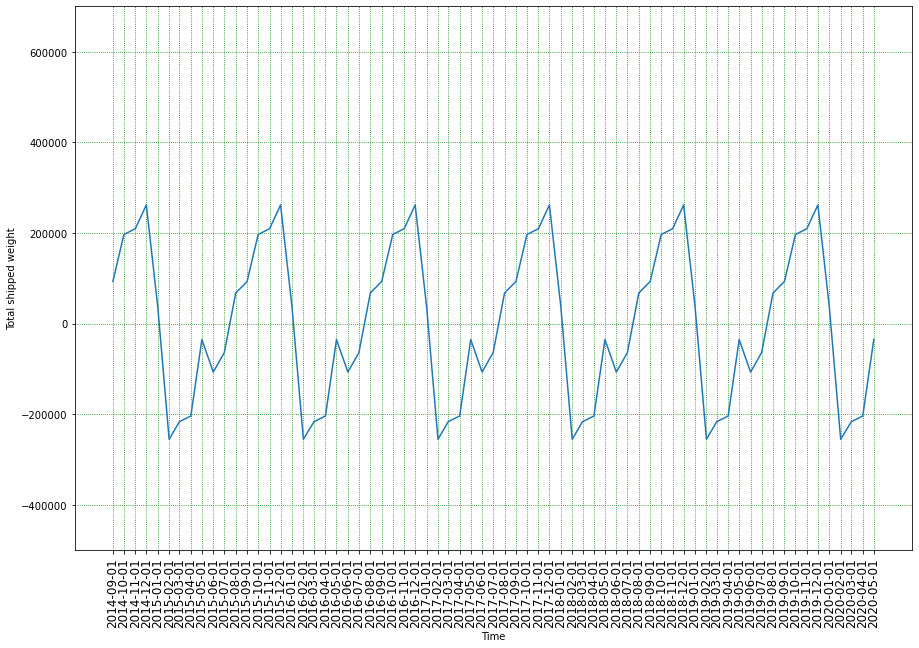

In [62]:
plt.figure(figsize=figsize)
plt.plot(seasonal_component)
plt.xticks(list_date, fontsize=12, rotation=90)
#plt.xticklabels(list_date, fontsize=12, rotation=90)

#plt.title("redidual of the total shipped weight")
plt.ylim(-500000, 700000)
plt.ylabel("Total shipped weight")
plt.xlabel("Time")

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.grid(linestyle = ':', color = 'green')
plt.show()

In [94]:
result_log = seasonal_decompose(np.log(df_wt), model='additive', period=30)

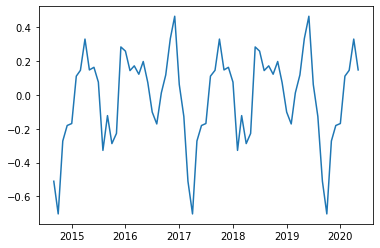

In [95]:
plt.plot(result_log.seasonal)

In [96]:
df.columns

Index(['awb_id', 'origin', 'destination', 'ship_origin', 'ship_destination',
       'rec_qty', 'rec_wt', 'charge', 'rec_date', 'date_shipped', 'flight_num',
       'shipped_qty', 'wt_shipped', 'commodity', 'goods_type', 'category',
       'RetreivedDate', 'ReportDate', 'date', 'month', 'week', 'year', 'day',
       'month_str', 'day_str', 'is_fuel', 'date_str', 'goods_category',
       'date_s', 'date_m'],
      dtype='object')

Now we will get the seasonality for each category 

For fuel data

In [738]:
#dict_df_wt_cats this dictionary has all the total weights data for diffreent categories

def get_trend_seasonality_residual(dict_data, cat, order):
    
    df_cat = dict_data[cat]
    
    #order = 2 #second degree polynomial
    #trend component
    coef_trend = np.polyfit(np.arange(len(df_cat['wt_shipped'])),
                  df_cat['wt_shipped'].values.ravel(),
                  order)
    poly_mdl = np.poly1d(coef_trend)  # for coef is for constant term, second coef for x abd thisr coef for x^2

    trend_cat = pd.Series(data = poly_mdl(np.arange(len(df_cat['wt_shipped']))),
                  index = df_cat.index)
    detrended_cat = df_cat['wt_shipped'] - trend_cat

    
    #seasonality component
    seasonal_cat = detrended_cat.groupby(by = detrended_cat.index.month).mean() #for one year
    #print(seasonal_cat)
    seasonal_component_cat = copy.deepcopy(df_cat)
    for i in seasonal_cat.index: #repeat it for all the data
        seasonal_component_cat.loc[seasonal_component_cat.index.month == i, 'wt_shipped'] = seasonal_cat.loc[i]
        
    deseasonal_cat = df_cat - seasonal_component_cat
    
    #approximating trend again
    #get the approximated trend
    coef = np.polyfit(np.arange(len(deseasonal_cat)), deseasonal_cat['wt_shipped'], order)


    poly_mdl = np.poly1d(coef)
    trend_comp_cat = pd.DataFrame(data = poly_mdl(np.arange(len(deseasonal_cat['wt_shipped']))),
                          index = df_cat.index,
                          columns=['wt_shipped'])

    #trend_comp_cat = pd.DataFrame(data = trend_cat,
     #                     index = df_cat.index,
     #                     columns=['wt_shipped'])
    
    
    residual_cat = df_cat - seasonal_component_cat - trend_comp_cat
    
        
    return df_cat, trend_comp_cat, seasonal_cat, seasonal_component_cat, residual_cat





In [739]:
df_fuel1, trend_comp_fuel1, seasonal_fuel1, seasonal_component_fuel1, residual_fuel1 = get_trend_seasonality_residual(dict_data = dict_df_wt_cats, cat='Fuel', order = 2)

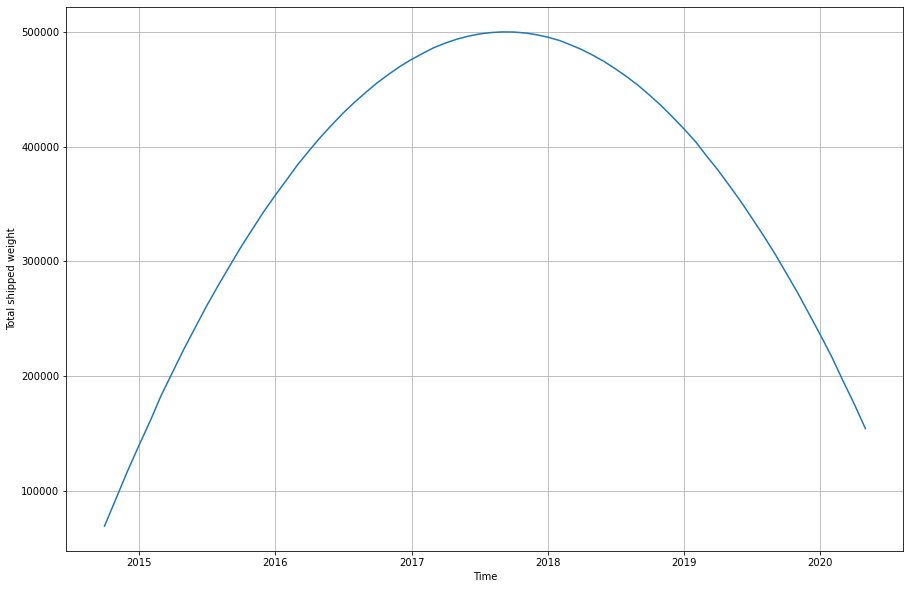

In [740]:
plt.figure(figsize=figsize)
#plt.plot(df_fuel1)

plt.plot(trend_comp_fuel1)
#plt.title("Trend of the total shipped weight of the fuel data")
plt.ylabel("Total shipped weight")
plt.xlabel("Time")
plt.show()

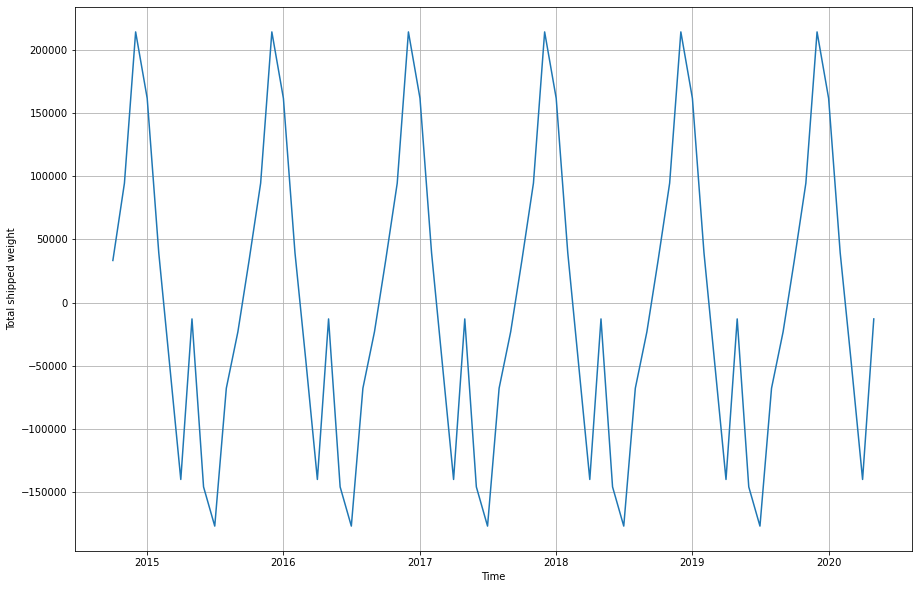

In [741]:
plt.figure(figsize=figsize)

plt.plot(seasonal_component_fuel1) #add the other seasonality as well
xlabel="Month"
ylabel="Total shipped weight"
#labels = ['Fuel data', 'All data']
#plt.legend(labels)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.title("Seasonality of the total shipped weight of the fuel data")
plt.ylabel("Total shipped weight")
plt.xlabel("Time")

plt.show()

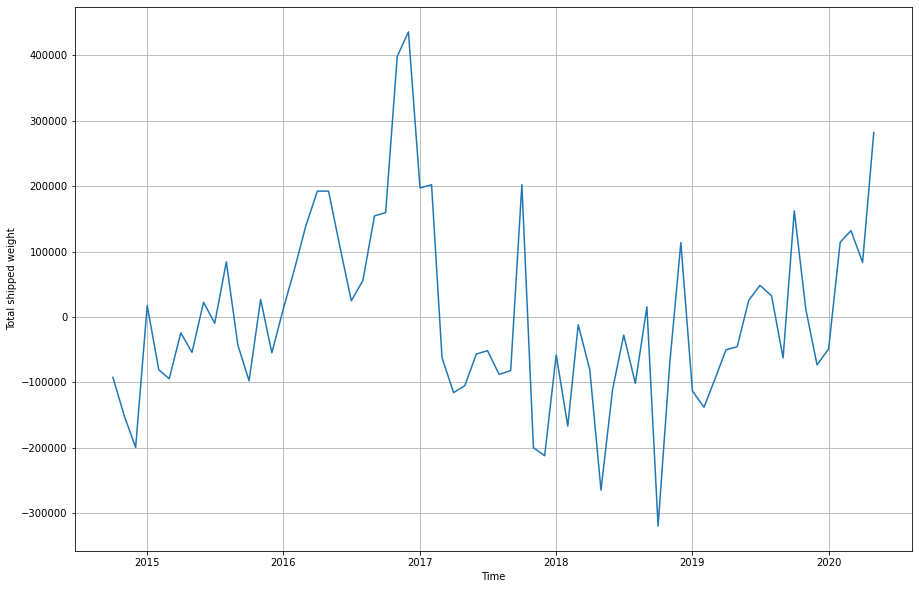

In [67]:
plt.figure(figsize=figsize)

plt.plot(residual_fuel1) #add the other seasonality as well
xlabel="Month"
ylabel="Total shipped weight"
#labels = ['Fuel data', 'All data']
#plt.legend(labels)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.title("Residual of the total shipped weight of the fuel data")
plt.ylabel("Total shipped weight")
plt.xlabel("Time")
plt.show()

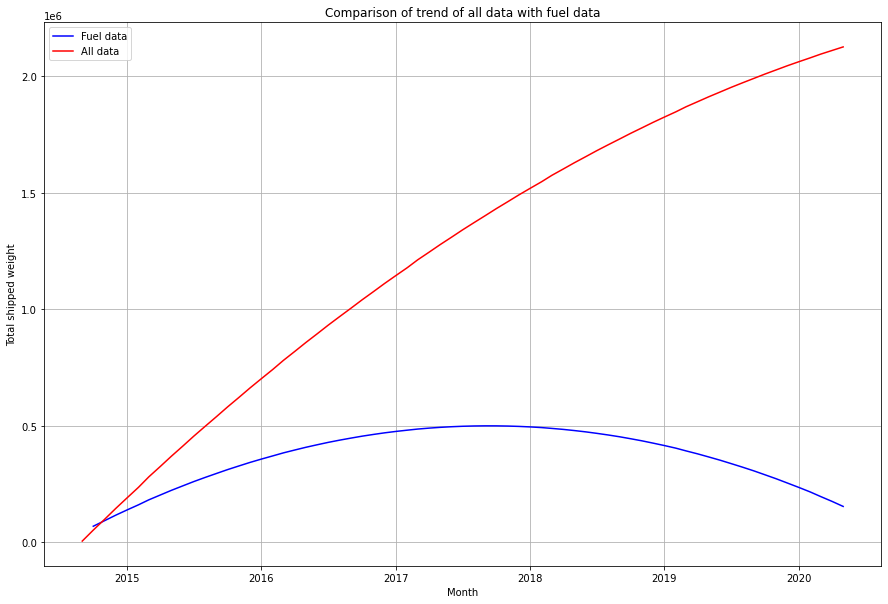

In [68]:
plt.figure(figsize=figsize)
plt.plot(trend_comp_fuel1, color = 'blue')
plt.plot(trend_comp, color = 'red')
xlabel="Month"
ylabel="Total shipped weight"
labels = ['Fuel data','All data' ]
plt.legend(labels)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Comparison of trend of all data with fuel data")
plt.show()

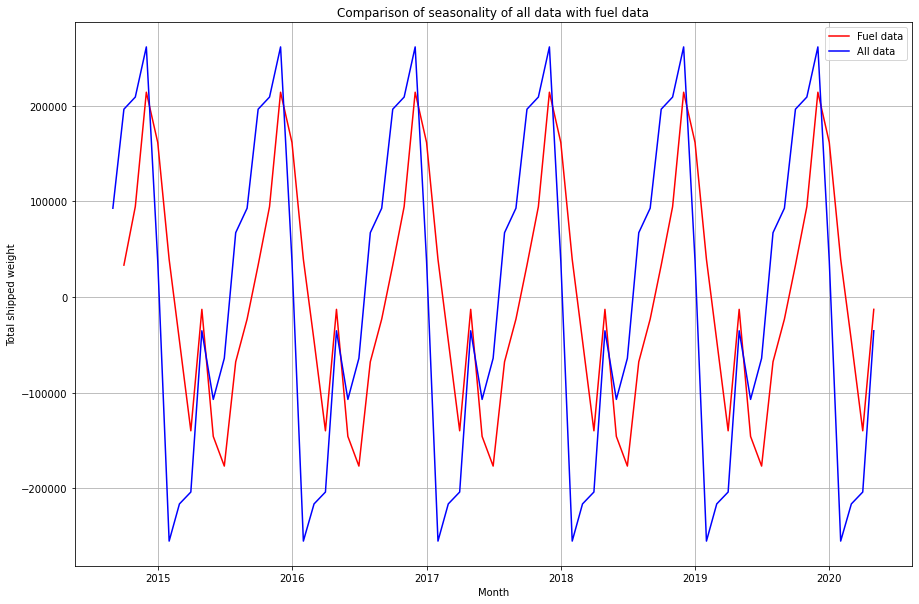

In [69]:
plt.figure(figsize=figsize)

plt.plot(seasonal_component_fuel1, color = 'red') #add the other seasonality as well
plt.plot(seasonal_component, color = 'blue')
xlabel="Month"
ylabel="Total shipped weight"
labels = ['Fuel data', 'All data']
plt.legend(labels)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Comparison of seasonality of all data with fuel data")

plt.show()

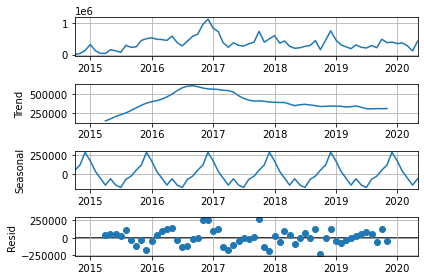

In [636]:
df_fuel2 = dict_df_wt_cats['Fuel']

decomposition = sm.tsa.seasonal_decompose(df_fuel2,  model = 'additive',period = 12)
fig = decomposition.plot()
plt.show()

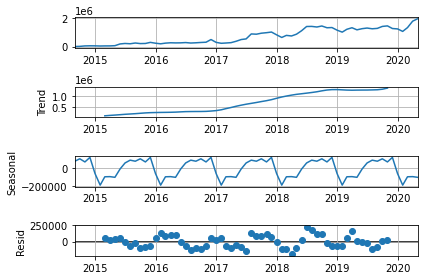

In [749]:
df_food2 = dict_df_wt_cats['Food']

decomposition = sm.tsa.seasonal_decompose(df_food2,  model = 'additive',period = 12)
fig = decomposition.plot()
plt.show()

Food data

In [742]:
df_food1, trend_comp_food1, seasonal_food1, seasonal_component_food1, residual_food1 = get_trend_seasonality_residual(dict_data = dict_df_wt_cats, cat='Food', order = 2)

In [752]:
df_wt


,wt_shipped
date_m,
2014-09-01,272
2014-10-01,25888
2014-11-01,108182
2014-12-01,221832
2015-01-01,380651
...,...
2020-01-01,1765235
2020-02-01,1584520
2020-03-01,1830269


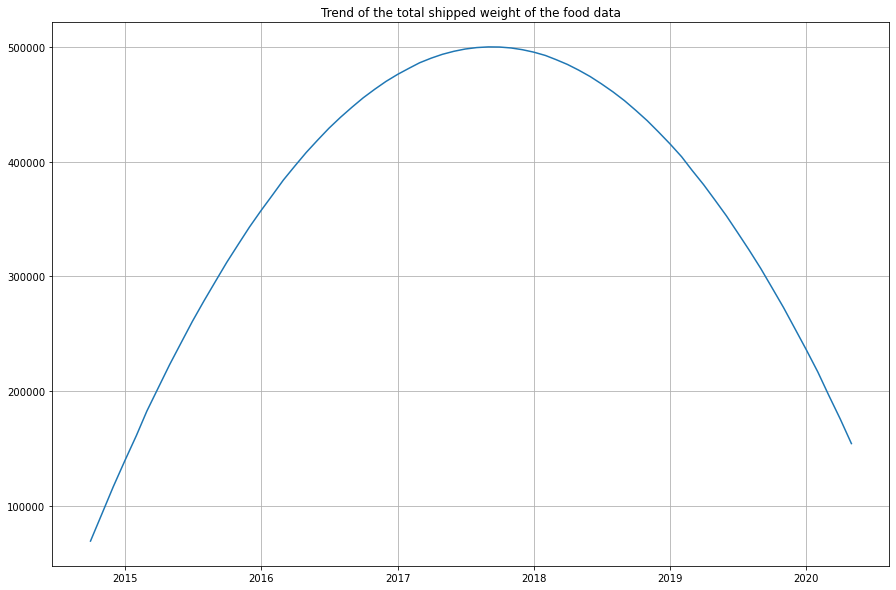

In [748]:
plt.figure(figsize=figsize)
#plt.plot(df_food1)

plt.plot(trend_comp_fuel1)
plt.title("Trend of the total shipped weight of the food data")
plt.show()

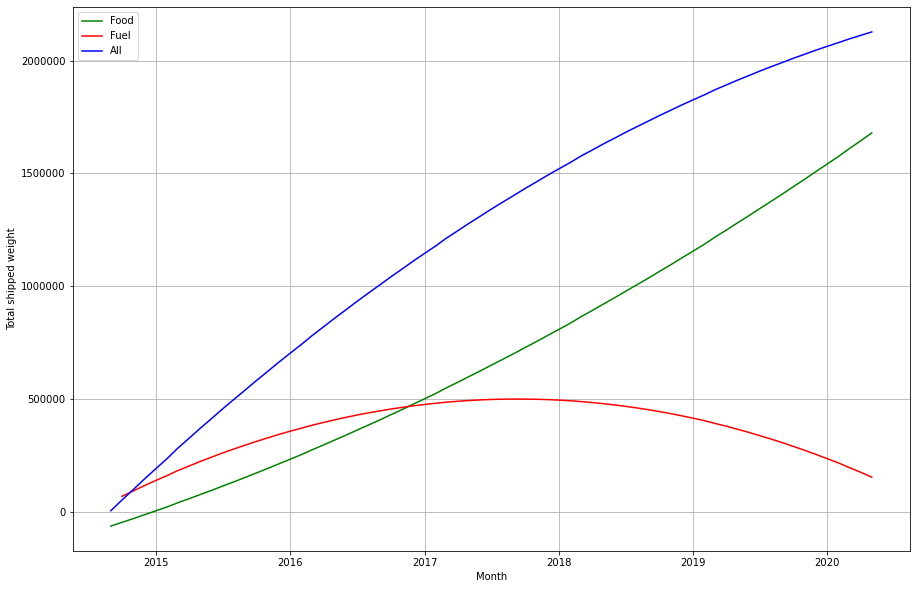

In [750]:
plt.figure(figsize=figsize)
plt.plot(trend_comp_food1, color = 'green')

plt.plot(trend_comp_fuel1, color = 'red')
plt.plot(trend_comp, color = 'blue')
xlabel="Month"
ylabel="Total shipped weight"
labels = ['Food', 'Fuel','All' ]
#plt.ylim(-650000, 2500000)

plt.ticklabel_format(style = 'plain', useOffset=None, axis='y')


plt.legend(labels)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
#plt.title("Comparison of trend of all data with fuel data and food data")
plt.show()

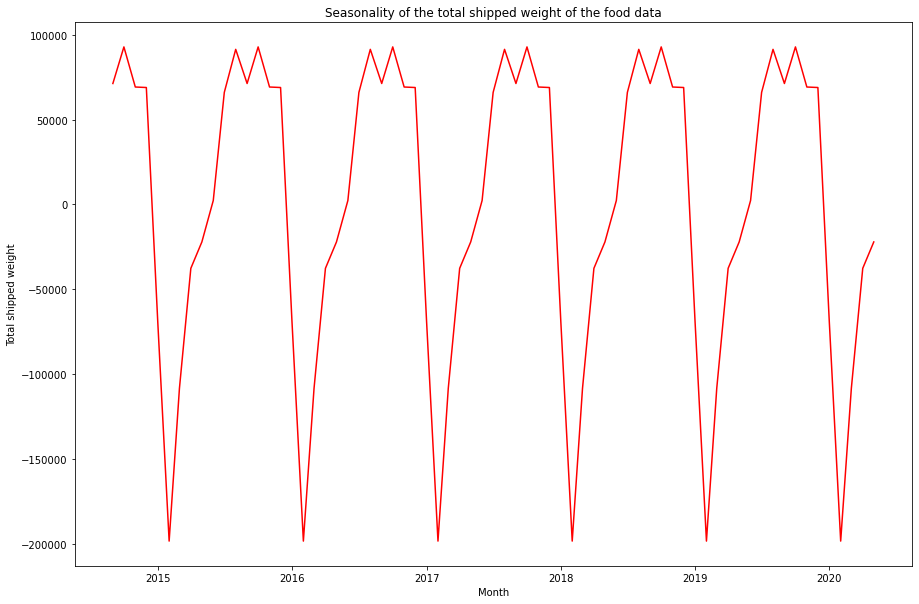

In [109]:
plt.figure(figsize=figsize)

plt.plot(seasonal_component_food1, color = 'red') #add the other seasonality as well
xlabel="Month"
ylabel="Total shipped weight"
#labels = ['Fuel data', 'All data']
#plt.legend(labels)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Seasonality of the total shipped weight of the food data")

plt.show()

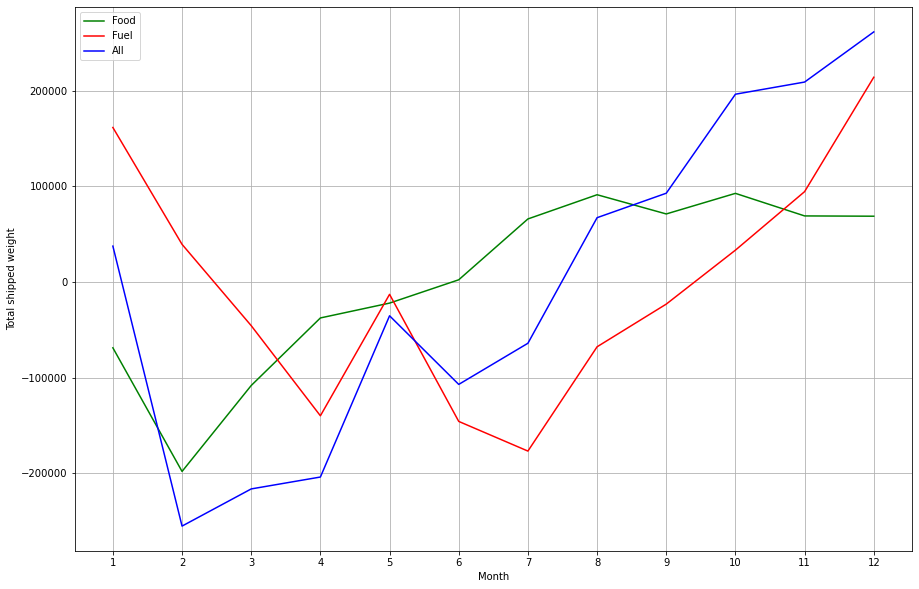

In [758]:
plt.figure(figsize=figsize)

plt.plot(seasonal_food1, color = 'green') 
plt.plot(seasonal_fuel1, color = 'red') 
plt.plot(seasonal, color = 'blue') 


xlabel="Month"
ylabel="Total shipped weight"
labels = ['Food', 'Fuel', 'All']
plt.locator_params(axis='x', nbins=24)

plt.legend(labels)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
#plt.title("Comparison of seasonality of all data with fuel data and food data")

plt.show()

C:\Users\arnoo\ns_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  # This is added back by InteractiveShellApp.init_path()


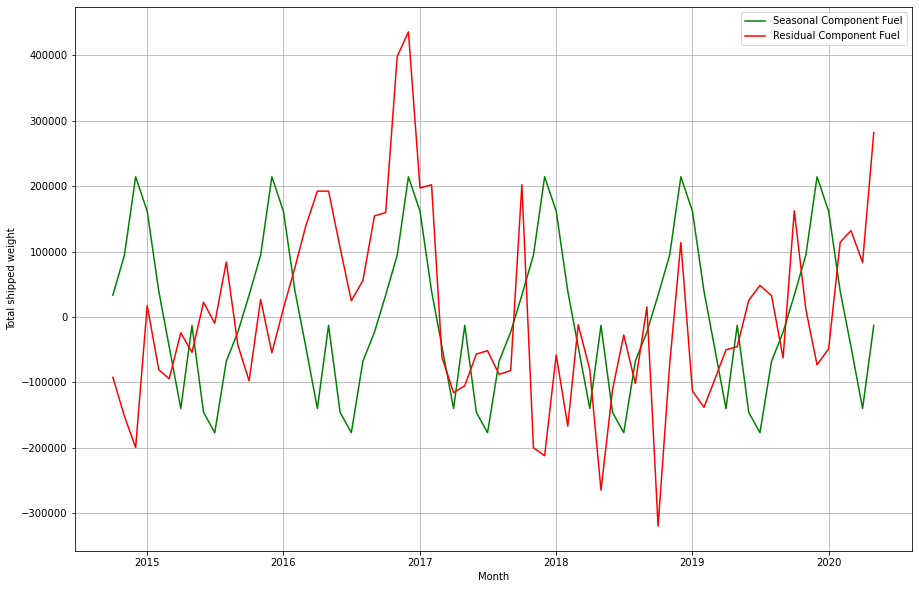

In [649]:
plt.figure(figsize=figsize)

plt.plot(seasonal_component_fuel1, color = 'green') 
plt.plot(residual_fuel1, color = 'red') 
#plt.plot(seasonal, color = 'blue') 


xlabel="Month"
ylabel="Total shipped weight"
labels = ['Seasonal Component Fuel', 'Residual Component Fuel']
plt.locator_params(axis='x', nbins=24)

plt.legend(labels)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
#plt.title("Comparison of seasonality of all data with fuel data and food data")

plt.show()